# RMOTR FINAL PROJECT QUESTION #7
# Does career satisfaction depend on company or organization size? Are there any other variables that are correlated to career satisfaction?

1. Reduce the data
- Convert categorical data into dummy variables to separate it out.
- Calculated the percentage of job satisfaction response versus company size in each block of company size (e.g. fewer than 10 employees is one block)
- Created a stacked bar plot to show the percentage of responses between career satisfaction
- Created a data set of career satisfaction versus developer type
- Created a heat map to visualize career satisfaction response vs developer type
- Repeat process for language worked with (manipulate data set and create heat map)
- Repeat process for self-taught type (manipulate data set and create heat map)

### Init the libraries and import the data from the zip file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

# magic function that renders the figure in a notebook
%matplotlib inline

In [2]:
zip_file = ZipFile('data/stack-overflow-2018-developer-survey.zip')

In [3]:
# survey_results_public.csv
full_df = pd.read_csv(zip_file.open('survey_results_public.csv'),low_memory=False)
#full_df = pd.read_csv(zip_file.open('survey_results_public.csv')) # should specify data types
full_df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# Reduced original data set for checking other variables

In [4]:
text_data_set = 'CompanySize,CareerSatisfaction,Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,ConvertedSalary,EducationTypes,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age'
reduced_data_columns = text_data_set.split(',')
print(reduced_data_columns)

['CompanySize', 'CareerSatisfaction', 'Employment', 'FormalEducation', 'UndergradMajor', 'DevType', 'YearsCoding', 'YearsCodingProf', 'SalaryType', 'ConvertedSalary', 'EducationTypes', 'SelfTaughtTypes', 'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'FrameworkWorkedWith', 'OperatingSystem', 'Gender', 'SexualOrientation', 'RaceEthnicity', 'Age']


In [5]:
reduced_df = full_df[reduced_data_columns]

In [6]:
reduced_df.shape

(98855, 21)

In [7]:
# get rid of warning
pd.options.mode.chained_assignment = None  # default='warn'

In [8]:
reduced_df.dropna(inplace=True) # get rid of NaN data

In [9]:
reduced_df.shape

(13860, 21)

In [10]:
reduced_df.reset_index(inplace=True,drop=True) # fix the index and drop the old index values from being added as a column

In [11]:
reduced_df.shape

(13860, 21)

In [12]:
reduced_df.head()

,CompanySize,CareerSatisfaction,Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,ConvertedSalary,...,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age
0,"10,000 or more employees",Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Yearly,70841.0,...,The official documentation and/or standards fo...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,35 - 44 years old
1,"10,000 or more employees",Moderately satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,Yearly,120000.0,...,The official documentation and/or standards fo...,JavaScript;HTML;CSS,MongoDB,Linux,Node.js;React,MacOS,Male,Straight or heterosexual,White or of European descent,18 - 24 years old
2,100 to 499 employees,Moderately satisfied,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,Yearly,250000.0,...,The official documentation and/or standards fo...,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,Hadoop;Node.js;React;Spark,MacOS,Male,Straight or heterosexual,White or of European descent,35 - 44 years old
3,20 to 99 employees,Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Back-end developer;Database administrator;Desi...,9-11 years,6-8 years,Monthly,420.0,...,Questions & answers on Stack Overflow,C#;JavaScript;PHP;SQL;HTML;CSS,MySQL,Linux;Mac OS;Windows Desktop or Server,.NET Core,Windows,Male,Straight or heterosexual,White or of European descent,25 - 34 years old
4,20 to 99 employees,Slightly satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Engineering manager,3-5 years,3-5 years,Monthly,30000.0,...,The official documentation and/or standards fo...,Python;SQL;HTML;Bash/Shell,MongoDB;Redis;MySQL;PostgreSQL,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,25 - 34 years old


## Just checking the unique variables for the upcoming comparison

In [13]:
reduced_df['CompanySize'].unique()

array(['10,000 or more employees', '100 to 499 employees',
       '20 to 99 employees', '10 to 19 employees', '500 to 999 employees',
       'Fewer than 10 employees', '1,000 to 4,999 employees',
       '5,000 to 9,999 employees'], dtype=object)

In [14]:
reduced_df['CareerSatisfaction'].unique()

array(['Neither satisfied nor dissatisfied', 'Moderately satisfied',
       'Slightly satisfied', 'Extremely satisfied',
       'Moderately dissatisfied', 'Extremely dissatisfied',
       'Slightly dissatisfied'], dtype=object)

# dataframe of only Company Size and Career Satisfaction

In [15]:
df_cs_cs = pd.concat([reduced_df['CompanySize'],reduced_df['CareerSatisfaction']],axis=1)

In [16]:
df_cs_cs

,CompanySize,CareerSatisfaction
0,"10,000 or more employees",Neither satisfied nor dissatisfied
1,"10,000 or more employees",Moderately satisfied
2,100 to 499 employees,Moderately satisfied
3,20 to 99 employees,Neither satisfied nor dissatisfied
4,20 to 99 employees,Slightly satisfied
5,20 to 99 employees,Moderately satisfied
6,100 to 499 employees,Moderately satisfied
7,20 to 99 employees,Slightly satisfied
8,100 to 499 employees,Extremely satisfied
9,10 to 19 employees,Moderately dissatisfied


In [17]:
comp_d = pd.get_dummies(df_cs_cs['CompanySize'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack(),prefix='CompanySize').sum(level=0)
comp_d.head()

,"CompanySize_1,000 to 4,999 employees",CompanySize_10 to 19 employees,"CompanySize_10,000 or more employees",CompanySize_100 to 499 employees,CompanySize_20 to 99 employees,"CompanySize_5,000 to 9,999 employees",CompanySize_500 to 999 employees,CompanySize_Fewer than 10 employees
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0


In [18]:
# Sorting the company size values
comp_dummies = pd.concat([comp_d['CompanySize_Fewer than 10 employees'],comp_d['CompanySize_10 to 19 employees'],comp_d['CompanySize_20 to 99 employees'],comp_d['CompanySize_100 to 499 employees'],comp_d['CompanySize_500 to 999 employees'],comp_d['CompanySize_1,000 to 4,999 employees'],comp_d['CompanySize_5,000 to 9,999 employees']],axis=1)
comp_dummies.head()

,CompanySize_Fewer than 10 employees,CompanySize_10 to 19 employees,CompanySize_20 to 99 employees,CompanySize_100 to 499 employees,CompanySize_500 to 999 employees,"CompanySize_1,000 to 4,999 employees","CompanySize_5,000 to 9,999 employees"
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [19]:
car_dummies = pd.get_dummies(df_cs_cs['CareerSatisfaction'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack(),prefix='CareerSatisfaction').sum(level=0)
car_dummies.head()

,CareerSatisfaction_Extremely dissatisfied,CareerSatisfaction_Extremely satisfied,CareerSatisfaction_Moderately dissatisfied,CareerSatisfaction_Moderately satisfied,CareerSatisfaction_Neither satisfied nor dissatisfied,CareerSatisfaction_Slightly dissatisfied,CareerSatisfaction_Slightly satisfied
0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1


In [20]:
df_cs = pd.concat([comp_dummies,car_dummies],axis=1)
df_cs.head()

,CompanySize_Fewer than 10 employees,CompanySize_10 to 19 employees,CompanySize_20 to 99 employees,CompanySize_100 to 499 employees,CompanySize_500 to 999 employees,"CompanySize_1,000 to 4,999 employees","CompanySize_5,000 to 9,999 employees",CareerSatisfaction_Extremely dissatisfied,CareerSatisfaction_Extremely satisfied,CareerSatisfaction_Moderately dissatisfied,CareerSatisfaction_Moderately satisfied,CareerSatisfaction_Neither satisfied nor dissatisfied,CareerSatisfaction_Slightly dissatisfied,CareerSatisfaction_Slightly satisfied
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [21]:
df_cs_test = df_cs_cs.groupby(['CompanySize', 'CareerSatisfaction'],sort=True)['CareerSatisfaction'].count().unstack('CareerSatisfaction').fillna(0)
df_cs_test.head()

CareerSatisfaction,Extremely dissatisfied,Extremely satisfied,Moderately dissatisfied,Moderately satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied
CompanySize,,,,,,,
"1,000 to 4,999 employees",35,315,87,628,75,111,258
10 to 19 employees,25,299,79,614,78,131,244
"10,000 or more employees",36,419,107,796,97,154,316
100 to 499 employees,61,539,170,1157,133,199,501
20 to 99 employees,89,676,193,1386,179,268,622


In [22]:
# get total number of responses in each category
# this is using the reduced data set with NaNs dropped
df_cs_total = df_cs_cs.groupby(['CompanySize', 'CareerSatisfaction'],sort=False)['CareerSatisfaction'].count().unstack('CareerSatisfaction').fillna(0)
df_cs_total.head()

CareerSatisfaction,Neither satisfied nor dissatisfied,Moderately satisfied,Slightly satisfied,Extremely satisfied,Moderately dissatisfied,Extremely dissatisfied,Slightly dissatisfied
CompanySize,,,,,,,
"10,000 or more employees",97,796,316,419,107,36,154
100 to 499 employees,133,1157,501,539,170,61,199
20 to 99 employees,179,1386,622,676,193,89,268
10 to 19 employees,78,614,244,299,79,25,131
500 to 999 employees,34,369,165,187,58,21,48


# Getting the percentage of the data instead

In [23]:
df_cs_total.loc['10 to 19 employees'].sum()

1470

In [24]:
df_cs_total.loc['20 to 99 employees'].sum()

3413

In [25]:
df_cs_total.loc['100 to 499 employees'].sum()

2760

In [26]:
df_cs_total.loc['500 to 999 employees'].sum()

882

In [27]:
df_cs_total.loc['10,000 or more employees'].sum()

1925

In [28]:
df_cs_cs_perc = df_cs_total.iloc[:,:].apply(lambda x: x / x.sum(),axis=1)
df_cs_cs_perc

CareerSatisfaction,Neither satisfied nor dissatisfied,Moderately satisfied,Slightly satisfied,Extremely satisfied,Moderately dissatisfied,Extremely dissatisfied,Slightly dissatisfied
CompanySize,,,,,,,
"10,000 or more employees",0.050390,0.413506,0.164156,0.217662,0.055584,0.018701,0.080000
100 to 499 employees,0.048188,0.419203,0.181522,0.195290,0.061594,0.022101,0.072101
20 to 99 employees,0.052447,0.406094,0.182244,0.198066,0.056548,0.026077,0.078523
10 to 19 employees,0.053061,0.417687,0.165986,0.203401,0.053741,0.017007,0.089116
500 to 999 employees,0.038549,0.418367,0.187075,0.212018,0.065760,0.023810,0.054422
Fewer than 10 employees,0.062121,0.378788,0.179545,0.196212,0.063636,0.027273,0.092424
"1,000 to 4,999 employees",0.049702,0.416170,0.170974,0.208748,0.057654,0.023194,0.073559
"5,000 to 9,999 employees",0.043029,0.428571,0.161790,0.216867,0.060241,0.012048,0.077453


In [29]:
# test calculation of "10 to 19 employees & Neither satisfied nor dissatisfied" / sum of "10 to 19 employees"
78/1470.0

0.053061224489795916

# Percentage of Career Satisfaction VS Company Size.
## The graph below shows that career satisfaction VS company size is evenly distributed and has no clear correlation.

In [30]:
#df_cs_cs_perc.bar(y = [['Extremely dissatisfied','Moderately dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Slightly satisfied','Moderately satisfied','Extremely satisfied']]
cs_sort = 'Fewer than 10 employees','10 to 19 employees','20 to 99 employees','100 to 499 employees','500 to 999 employees','1,000 to 4,999 employees','5,000 to 9,999 employees','10,000 or more employees'

# REINDEX IS THE KEY!
df_cs_cs_perc.reindex(cs_sort)

CareerSatisfaction,Neither satisfied nor dissatisfied,Moderately satisfied,Slightly satisfied,Extremely satisfied,Moderately dissatisfied,Extremely dissatisfied,Slightly dissatisfied
CompanySize,,,,,,,
Fewer than 10 employees,0.062121,0.378788,0.179545,0.196212,0.063636,0.027273,0.092424
10 to 19 employees,0.053061,0.417687,0.165986,0.203401,0.053741,0.017007,0.089116
20 to 99 employees,0.052447,0.406094,0.182244,0.198066,0.056548,0.026077,0.078523
100 to 499 employees,0.048188,0.419203,0.181522,0.195290,0.061594,0.022101,0.072101
500 to 999 employees,0.038549,0.418367,0.187075,0.212018,0.065760,0.023810,0.054422
"1,000 to 4,999 employees",0.049702,0.416170,0.170974,0.208748,0.057654,0.023194,0.073559
"5,000 to 9,999 employees",0.043029,0.428571,0.161790,0.216867,0.060241,0.012048,0.077453
"10,000 or more employees",0.050390,0.413506,0.164156,0.217662,0.055584,0.018701,0.080000


Text(0,0.5,'Percentage of Satisfaction')

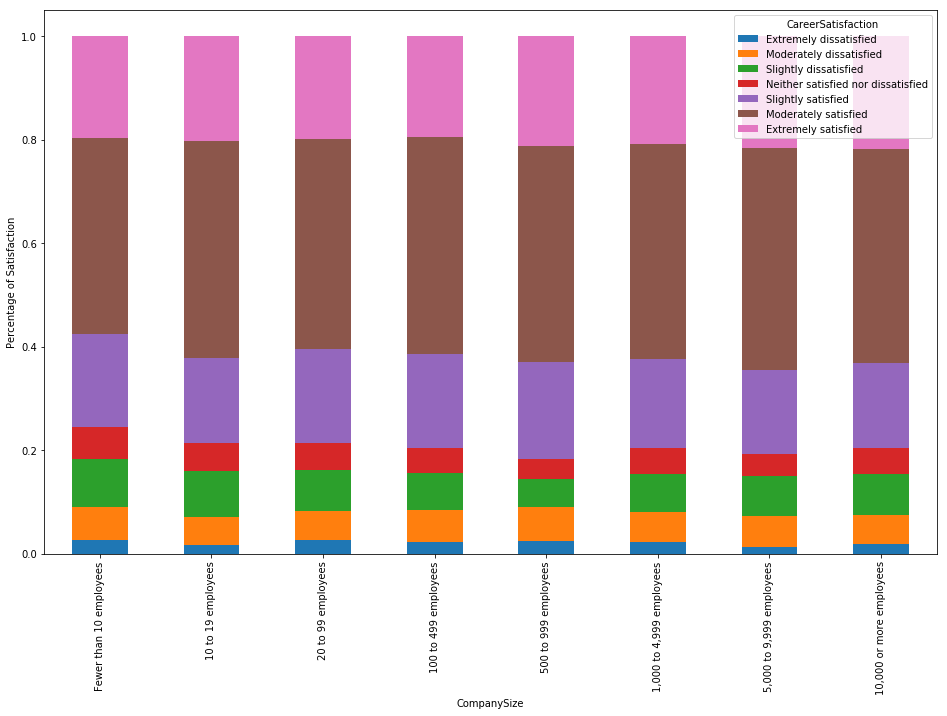

In [31]:
axb = df_cs_cs_perc.reindex(cs_sort)[['Extremely dissatisfied','Moderately dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Slightly satisfied','Moderately satisfied','Extremely satisfied']].plot(kind='bar', stacked=True, figsize=(16,10))
axb.set_ylabel("Percentage of Satisfaction")

In [32]:
reduced_df.YearsCodingProf.dtypes

dtype('O')

In [33]:
reduced_df.YearsCodingProf.unique()

array(['18-20 years', '0-2 years', '21-23 years', '6-8 years',
       '3-5 years', '9-11 years', '12-14 years', '15-17 years',
       '24-26 years', '27-29 years', '30 or more years'], dtype=object)

In [34]:
ordered_YearsCodingProf = ['0-2 years', '3-5 years', '6-8 years', '9-11 years', '12-14 years','15-17 years','18-20 years','21-23 years','24-26 years','27-29 years','30 or more years']

In [35]:
replace_YearsCodingProf = reduced_df.YearsCodingProf.astype("category",ordered=True,categories=ordered_YearsCodingProf).cat.codes

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [36]:
replace_YearsCodingProf.head()

0    6
1    0
2    7
3    2
4    1
dtype: int8

In [37]:
replace_YearsCodingProf.dtype

dtype('int8')

In [38]:
df_ycp = pd.concat([reduced_df,replace_YearsCodingProf],axis=1,sort=False)
df_ycp.head()

,CompanySize,CareerSatisfaction,Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,ConvertedSalary,...,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age,0
0,"10,000 or more employees",Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Yearly,70841.0,...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,35 - 44 years old,6
1,"10,000 or more employees",Moderately satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,Yearly,120000.0,...,JavaScript;HTML;CSS,MongoDB,Linux,Node.js;React,MacOS,Male,Straight or heterosexual,White or of European descent,18 - 24 years old,0
2,100 to 499 employees,Moderately satisfied,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,Yearly,250000.0,...,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,Hadoop;Node.js;React;Spark,MacOS,Male,Straight or heterosexual,White or of European descent,35 - 44 years old,7
3,20 to 99 employees,Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Back-end developer;Database administrator;Desi...,9-11 years,6-8 years,Monthly,420.0,...,C#;JavaScript;PHP;SQL;HTML;CSS,MySQL,Linux;Mac OS;Windows Desktop or Server,.NET Core,Windows,Male,Straight or heterosexual,White or of European descent,25 - 34 years old,2
4,20 to 99 employees,Slightly satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Engineering manager,3-5 years,3-5 years,Monthly,30000.0,...,Python;SQL;HTML;Bash/Shell,MongoDB;Redis;MySQL;PostgreSQL,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,25 - 34 years old,1


# Fix column name

In [39]:
# gapminder.rename(columns={'pop':'population','lifeExp':'life_exp','gdpPercap':'gdp_per_cap'},inplace=True)

In [40]:
df_ycp.columns

Index([        'CompanySize',  'CareerSatisfaction',          'Employment',
           'FormalEducation',      'UndergradMajor',             'DevType',
               'YearsCoding',     'YearsCodingProf',          'SalaryType',
           'ConvertedSalary',      'EducationTypes',     'SelfTaughtTypes',
        'LanguageWorkedWith',  'DatabaseWorkedWith',  'PlatformWorkedWith',
       'FrameworkWorkedWith',     'OperatingSystem',              'Gender',
         'SexualOrientation',       'RaceEthnicity',                 'Age',
                           0],
      dtype='object')

In [41]:
df_ycp.rename(columns={0:'YearsCodingProfInt'},inplace=True)

In [42]:
df_ycp.columns

Index(['CompanySize', 'CareerSatisfaction', 'Employment', 'FormalEducation',
       'UndergradMajor', 'DevType', 'YearsCoding', 'YearsCodingProf',
       'SalaryType', 'ConvertedSalary', 'EducationTypes', 'SelfTaughtTypes',
       'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith',
       'FrameworkWorkedWith', 'OperatingSystem', 'Gender', 'SexualOrientation',
       'RaceEthnicity', 'Age', 'YearsCodingProfInt'],
      dtype='object')

# Checking counts below

In [43]:
df_ycp['CareerSatisfaction'].unique()

array(['Neither satisfied nor dissatisfied', 'Moderately satisfied',
       'Slightly satisfied', 'Extremely satisfied',
       'Moderately dissatisfied', 'Extremely dissatisfied',
       'Slightly dissatisfied'], dtype=object)

In [44]:
df_ycp['YearsCodingProf'].unique()

array(['18-20 years', '0-2 years', '21-23 years', '6-8 years',
       '3-5 years', '9-11 years', '12-14 years', '15-17 years',
       '24-26 years', '27-29 years', '30 or more years'], dtype=object)

In [45]:
df_ycp['CareerSatisfaction'].value_counts() # series data

Moderately satisfied                  5699
Extremely satisfied                   2820
Slightly satisfied                    2437
Slightly dissatisfied                 1078
Moderately dissatisfied                813
Neither satisfied nor dissatisfied     703
Extremely dissatisfied                 310
Name: CareerSatisfaction, dtype: int64

In [46]:
df_ycp['YearsCodingProf'].value_counts() # series data

3-5 years           4130
0-2 years           2761
6-8 years           2414
9-11 years          1756
12-14 years          942
15-17 years          656
18-20 years          559
21-23 years          262
30 or more years     177
24-26 years          122
27-29 years           81
Name: YearsCodingProf, dtype: int64

In [47]:
df_ycp.head()

,CompanySize,CareerSatisfaction,Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,ConvertedSalary,...,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age,YearsCodingProfInt
0,"10,000 or more employees",Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Yearly,70841.0,...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,35 - 44 years old,6
1,"10,000 or more employees",Moderately satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,Yearly,120000.0,...,JavaScript;HTML;CSS,MongoDB,Linux,Node.js;React,MacOS,Male,Straight or heterosexual,White or of European descent,18 - 24 years old,0
2,100 to 499 employees,Moderately satisfied,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,Yearly,250000.0,...,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,Hadoop;Node.js;React;Spark,MacOS,Male,Straight or heterosexual,White or of European descent,35 - 44 years old,7
3,20 to 99 employees,Neither satisfied nor dissatisfied,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Back-end developer;Database administrator;Desi...,9-11 years,6-8 years,Monthly,420.0,...,C#;JavaScript;PHP;SQL;HTML;CSS,MySQL,Linux;Mac OS;Windows Desktop or Server,.NET Core,Windows,Male,Straight or heterosexual,White or of European descent,25 - 34 years old,2
4,20 to 99 employees,Slightly satisfied,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Engineering manager,3-5 years,3-5 years,Monthly,30000.0,...,Python;SQL;HTML;Bash/Shell,MongoDB;Redis;MySQL;PostgreSQL,Linux,Django,Linux-based,Male,Straight or heterosexual,White or of European descent,25 - 34 years old,1


In [48]:
ycp_dummies = pd.get_dummies(df_ycp['YearsCodingProf'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack(),prefix='YearsCodingProf').sum(level=0)
ycp_dummies.head()

,YearsCodingProf_0-2 years,YearsCodingProf_12-14 years,YearsCodingProf_15-17 years,YearsCodingProf_18-20 years,YearsCodingProf_21-23 years,YearsCodingProf_24-26 years,YearsCodingProf_27-29 years,YearsCodingProf_3-5 years,YearsCodingProf_30 or more years,YearsCodingProf_6-8 years,YearsCodingProf_9-11 years
0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0


In [49]:
df_ycp_2 = pd.concat([reduced_df['CareerSatisfaction'],ycp_dummies],axis=1,sort=False)
df_ycp_2.head()

,CareerSatisfaction,YearsCodingProf_0-2 years,YearsCodingProf_12-14 years,YearsCodingProf_15-17 years,YearsCodingProf_18-20 years,YearsCodingProf_21-23 years,YearsCodingProf_24-26 years,YearsCodingProf_27-29 years,YearsCodingProf_3-5 years,YearsCodingProf_30 or more years,YearsCodingProf_6-8 years,YearsCodingProf_9-11 years
0,Neither satisfied nor dissatisfied,0,0,0,1,0,0,0,0,0,0,0
1,Moderately satisfied,1,0,0,0,0,0,0,0,0,0,0
2,Moderately satisfied,0,0,0,0,1,0,0,0,0,0,0
3,Neither satisfied nor dissatisfied,0,0,0,0,0,0,0,0,0,1,0
4,Slightly satisfied,0,0,0,0,0,0,0,1,0,0,0


In [50]:
heatmap_input_2 = df_ycp_2.groupby(['CareerSatisfaction']).sum()
heatmap_input_2.head()

,YearsCodingProf_0-2 years,YearsCodingProf_12-14 years,YearsCodingProf_15-17 years,YearsCodingProf_18-20 years,YearsCodingProf_21-23 years,YearsCodingProf_24-26 years,YearsCodingProf_27-29 years,YearsCodingProf_3-5 years,YearsCodingProf_30 or more years,YearsCodingProf_6-8 years,YearsCodingProf_9-11 years
CareerSatisfaction,,,,,,,,,,,
Extremely dissatisfied,76.0,23.0,13.0,15.0,3.0,5.0,2.0,93.0,7.0,40.0,33.0
Extremely satisfied,615.0,172.0,125.0,105.0,55.0,33.0,17.0,887.0,49.0,444.0,318.0
Moderately dissatisfied,189.0,55.0,37.0,30.0,19.0,5.0,7.0,244.0,7.0,143.0,77.0
Moderately satisfied,997.0,419.0,287.0,254.0,120.0,53.0,40.0,1598.0,85.0,1075.0,771.0
Neither satisfied nor dissatisfied,189.0,58.0,36.0,32.0,11.0,3.0,2.0,194.0,6.0,91.0,81.0


# Heatmap of Career Satisfaction VS Years Coding Professionally

In [51]:
# Another comparison of Career Satisfaction using Language Worked With
dt_dummies = pd.get_dummies(df_ycp['DevType'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack(),prefix='DevType').sum(level=0)
dt_dummies.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
3,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [52]:
df_cs_dt = pd.concat([reduced_df['CareerSatisfaction'],dt_dummies],axis=1,sort=False)
df_cs_dt.head()

,CareerSatisfaction,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,Neither satisfied nor dissatisfied,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,Moderately satisfied,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,Moderately satisfied,1,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
3,Neither satisfied nor dissatisfied,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,Slightly satisfied,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
heatmap_input_cs_dt = df_cs_dt.groupby(['CareerSatisfaction']).sum()
heatmap_input_cs_dt.head()

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
CareerSatisfaction,,,,,,,,,,,,,,,,,,,,
Extremely dissatisfied,217.0,10.0,34.0,31.0,61.0,36.0,50.0,55.0,8.0,11.0,25.0,130.0,209.0,6.0,2.0,81.0,10.0,24.0,21.0,52.0
Extremely satisfied,1883.0,136.0,224.0,255.0,456.0,277.0,512.0,537.0,87.0,116.0,291.0,1194.0,1852.0,83.0,22.0,588.0,159.0,207.0,165.0,356.0
Moderately dissatisfied,554.0,22.0,65.0,67.0,114.0,90.0,139.0,118.0,29.0,34.0,41.0,346.0,500.0,30.0,5.0,158.0,37.0,65.0,50.0,107.0
Moderately satisfied,3955.0,187.0,437.0,474.0,884.0,569.0,1102.0,1011.0,167.0,233.0,494.0,2403.0,3721.0,165.0,38.0,1025.0,306.0,412.0,290.0,730.0
Neither satisfied nor dissatisfied,481.0,20.0,65.0,53.0,135.0,86.0,165.0,107.0,19.0,30.0,40.0,326.0,450.0,25.0,5.0,134.0,27.0,71.0,52.0,110.0


# Fixing data for heatmap
1. extract the index and turn it into a column
2. make that column categorical
3. set it back again as the index (edited) 

In [54]:
from pandas.api.types import CategoricalDtype

In [55]:
# https://notebooks.ai/rmotr-curriculum/32-categorical-ordering-and-categoricaldtype-13a82831

In [56]:
heatmap_input_cs_dt.reset_index(inplace=True)
heatmap_input_cs_dt.head(7)

,CareerSatisfaction,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,Extremely dissatisfied,217.0,10.0,34.0,31.0,61.0,36.0,50.0,55.0,8.0,...,25.0,130.0,209.0,6.0,2.0,81.0,10.0,24.0,21.0,52.0
1,Extremely satisfied,1883.0,136.0,224.0,255.0,456.0,277.0,512.0,537.0,87.0,...,291.0,1194.0,1852.0,83.0,22.0,588.0,159.0,207.0,165.0,356.0
2,Moderately dissatisfied,554.0,22.0,65.0,67.0,114.0,90.0,139.0,118.0,29.0,...,41.0,346.0,500.0,30.0,5.0,158.0,37.0,65.0,50.0,107.0
3,Moderately satisfied,3955.0,187.0,437.0,474.0,884.0,569.0,1102.0,1011.0,167.0,...,494.0,2403.0,3721.0,165.0,38.0,1025.0,306.0,412.0,290.0,730.0
4,Neither satisfied nor dissatisfied,481.0,20.0,65.0,53.0,135.0,86.0,165.0,107.0,19.0,...,40.0,326.0,450.0,25.0,5.0,134.0,27.0,71.0,52.0,110.0
5,Slightly dissatisfied,768.0,22.0,114.0,70.0,202.0,143.0,236.0,155.0,30.0,...,52.0,497.0,722.0,34.0,10.0,213.0,60.0,96.0,57.0,139.0
6,Slightly satisfied,1681.0,54.0,199.0,178.0,378.0,257.0,494.0,344.0,55.0,...,149.0,1051.0,1572.0,83.0,13.0,470.0,96.0,197.0,145.0,266.0


In [57]:
cat_dtype = CategoricalDtype(categories=reversed([
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Moderately satisfied',
    'Extremely satisfied']),
    ordered=True)

cat_dtype

CategoricalDtype(categories=['Extremely satisfied', 'Moderately satisfied',
                  'Slightly satisfied', 'Neither satisfied nor dissatisfied',
                  'Slightly dissatisfied', 'Moderately dissatisfied',
                  'Extremely dissatisfied'],
                 ordered=True)

In [58]:
heatmap_input_cs_dt['CareerSatisfaction'] = heatmap_input_cs_dt['CareerSatisfaction'].astype(cat_dtype)

In [59]:
heatmap_input_cs_dt.head()

,CareerSatisfaction,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,...,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
0,Extremely dissatisfied,217.0,10.0,34.0,31.0,61.0,36.0,50.0,55.0,8.0,...,25.0,130.0,209.0,6.0,2.0,81.0,10.0,24.0,21.0,52.0
1,Extremely satisfied,1883.0,136.0,224.0,255.0,456.0,277.0,512.0,537.0,87.0,...,291.0,1194.0,1852.0,83.0,22.0,588.0,159.0,207.0,165.0,356.0
2,Moderately dissatisfied,554.0,22.0,65.0,67.0,114.0,90.0,139.0,118.0,29.0,...,41.0,346.0,500.0,30.0,5.0,158.0,37.0,65.0,50.0,107.0
3,Moderately satisfied,3955.0,187.0,437.0,474.0,884.0,569.0,1102.0,1011.0,167.0,...,494.0,2403.0,3721.0,165.0,38.0,1025.0,306.0,412.0,290.0,730.0
4,Neither satisfied nor dissatisfied,481.0,20.0,65.0,53.0,135.0,86.0,165.0,107.0,19.0,...,40.0,326.0,450.0,25.0,5.0,134.0,27.0,71.0,52.0,110.0


In [60]:
heatmap_input_cs_dt['CareerSatisfaction'].dtype

CategoricalDtype(categories=['Extremely satisfied', 'Moderately satisfied',
                  'Slightly satisfied', 'Neither satisfied nor dissatisfied',
                  'Slightly dissatisfied', 'Moderately dissatisfied',
                  'Extremely dissatisfied'],
                 ordered=True)

In [61]:
# Sort the values before setting the index
heatmap_input_cs_dt.sort_values(by='CareerSatisfaction', inplace=True)

In [62]:
# Set the index to get this sorted order to the data
heatmap_input_cs_dt.set_index('CareerSatisfaction', inplace=True)
heatmap_input_cs_dt.head(7)

,DevType_Back-end developer,"DevType_C-suite executive (CEO, CTO, etc.)",DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_Desktop or enterprise applications developer,DevType_DevOps specialist,DevType_Educator or academic researcher,DevType_Embedded applications or devices developer,DevType_Engineering manager,DevType_Front-end developer,DevType_Full-stack developer,DevType_Game or graphics developer,DevType_Marketing or sales professional,DevType_Mobile developer,DevType_Product manager,DevType_QA or test developer,DevType_Student,DevType_System administrator
CareerSatisfaction,,,,,,,,,,,,,,,,,,,,
Extremely satisfied,1883.0,136.0,224.0,255.0,456.0,277.0,512.0,537.0,87.0,116.0,291.0,1194.0,1852.0,83.0,22.0,588.0,159.0,207.0,165.0,356.0
Moderately satisfied,3955.0,187.0,437.0,474.0,884.0,569.0,1102.0,1011.0,167.0,233.0,494.0,2403.0,3721.0,165.0,38.0,1025.0,306.0,412.0,290.0,730.0
Slightly satisfied,1681.0,54.0,199.0,178.0,378.0,257.0,494.0,344.0,55.0,108.0,149.0,1051.0,1572.0,83.0,13.0,470.0,96.0,197.0,145.0,266.0
Neither satisfied nor dissatisfied,481.0,20.0,65.0,53.0,135.0,86.0,165.0,107.0,19.0,30.0,40.0,326.0,450.0,25.0,5.0,134.0,27.0,71.0,52.0,110.0
Slightly dissatisfied,768.0,22.0,114.0,70.0,202.0,143.0,236.0,155.0,30.0,63.0,52.0,497.0,722.0,34.0,10.0,213.0,60.0,96.0,57.0,139.0
Moderately dissatisfied,554.0,22.0,65.0,67.0,114.0,90.0,139.0,118.0,29.0,34.0,41.0,346.0,500.0,30.0,5.0,158.0,37.0,65.0,50.0,107.0
Extremely dissatisfied,217.0,10.0,34.0,31.0,61.0,36.0,50.0,55.0,8.0,11.0,25.0,130.0,209.0,6.0,2.0,81.0,10.0,24.0,21.0,52.0


# 7. Heatmap shows that (DevType) Back-End, Front-End, and Full-Stack developers are the most satisfied with their careers (CareerSatisfaction)

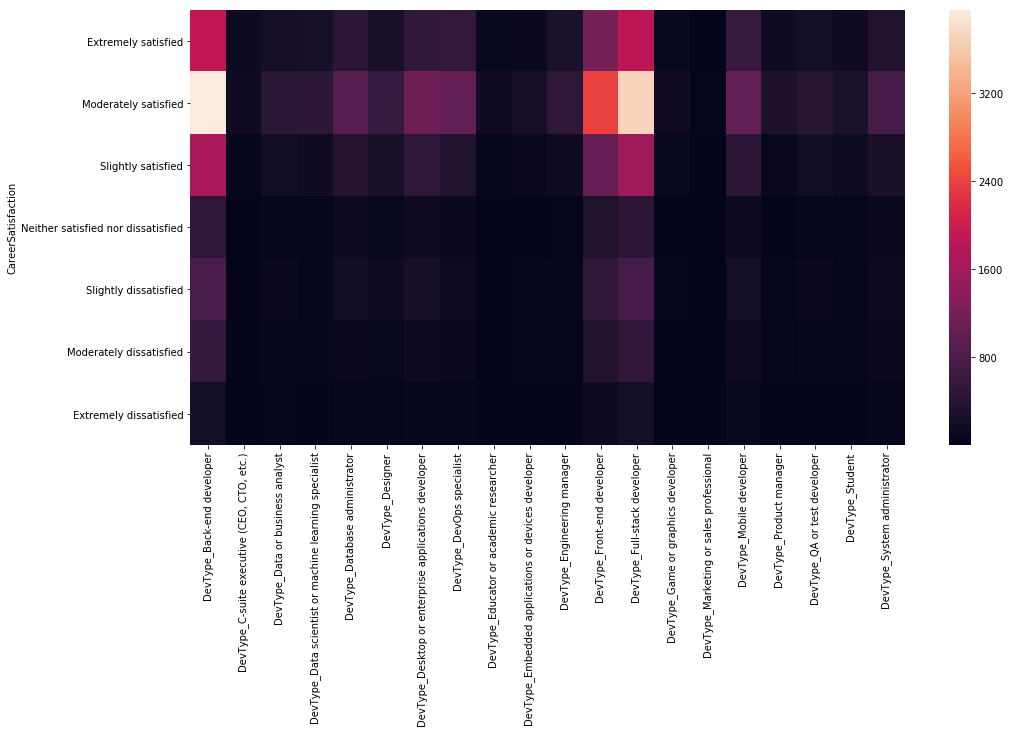

In [63]:
plt.figure(figsize=(16,8))
sns.heatmap(heatmap_input_cs_dt)

# Comparison of Career Satisfaction VS Language Worked With

In [64]:
# Another comparison of Career Satisfaction using Language Worked With
lww_dummies = pd.get_dummies(reduced_df['LanguageWorkedWith'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack(),prefix='LanguageWorkedWith').sum(level=0)
lww_dummies.head()

,LanguageWorkedWith_Assembly,LanguageWorkedWith_Bash/Shell,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_C++,LanguageWorkedWith_CSS,LanguageWorkedWith_Clojure,LanguageWorkedWith_Cobol,LanguageWorkedWith_CoffeeScript,LanguageWorkedWith_Delphi/Object Pascal,...,LanguageWorkedWith_R,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_SQL,LanguageWorkedWith_Scala,LanguageWorkedWith_Swift,LanguageWorkedWith_TypeScript,LanguageWorkedWith_VB.NET,LanguageWorkedWith_VBA,LanguageWorkedWith_Visual Basic 6
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
# Using reduced data set from earlier that is just these columns:
# 'Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,ConvertedSalary,EducationTypes,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age'
# reduced_df

#df_heatmap = df_ycp['CareerSatisfaction','YearsCodingProf']
df_cs_lww = pd.concat([reduced_df['CareerSatisfaction'],lww_dummies],axis=1) # need to include axis=1 for columns
df_cs_lww.head()

,CareerSatisfaction,LanguageWorkedWith_Assembly,LanguageWorkedWith_Bash/Shell,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_C++,LanguageWorkedWith_CSS,LanguageWorkedWith_Clojure,LanguageWorkedWith_Cobol,LanguageWorkedWith_CoffeeScript,...,LanguageWorkedWith_R,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_SQL,LanguageWorkedWith_Scala,LanguageWorkedWith_Swift,LanguageWorkedWith_TypeScript,LanguageWorkedWith_VB.NET,LanguageWorkedWith_VBA,LanguageWorkedWith_Visual Basic 6
0,Neither satisfied nor dissatisfied,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Moderately satisfied,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Moderately satisfied,1,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,Neither satisfied nor dissatisfied,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Slightly satisfied,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
df_cs_lww['CareerSatisfaction'].dtype

dtype('O')

##  Change the Career Satisfaction column to an Ordered Categorical Data Type

In [67]:
df_cs_lww['CareerSatisfaction'] = df_cs_lww['CareerSatisfaction'].astype(cat_dtype) #first step
df_cs_lww.head()

,CareerSatisfaction,LanguageWorkedWith_Assembly,LanguageWorkedWith_Bash/Shell,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_C++,LanguageWorkedWith_CSS,LanguageWorkedWith_Clojure,LanguageWorkedWith_Cobol,LanguageWorkedWith_CoffeeScript,...,LanguageWorkedWith_R,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_SQL,LanguageWorkedWith_Scala,LanguageWorkedWith_Swift,LanguageWorkedWith_TypeScript,LanguageWorkedWith_VB.NET,LanguageWorkedWith_VBA,LanguageWorkedWith_Visual Basic 6
0,Neither satisfied nor dissatisfied,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Moderately satisfied,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Moderately satisfied,1,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,Neither satisfied nor dissatisfied,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Slightly satisfied,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
df_cs_lww['CareerSatisfaction'].dtype

CategoricalDtype(categories=['Extremely satisfied', 'Moderately satisfied',
                  'Slightly satisfied', 'Neither satisfied nor dissatisfied',
                  'Slightly dissatisfied', 'Moderately dissatisfied',
                  'Extremely dissatisfied'],
                 ordered=True)

## Group the data and get the counts per language worked with

In [69]:
# Group data in order to get the counts per level of career satisfaction
heatmap_input_cs_lww = df_cs_lww.groupby(['CareerSatisfaction']).sum()   # counts of these languages
heatmap_input_cs_lww.head(7)

,LanguageWorkedWith_Assembly,LanguageWorkedWith_Bash/Shell,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_C++,LanguageWorkedWith_CSS,LanguageWorkedWith_Clojure,LanguageWorkedWith_Cobol,LanguageWorkedWith_CoffeeScript,LanguageWorkedWith_Delphi/Object Pascal,...,LanguageWorkedWith_R,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_SQL,LanguageWorkedWith_Scala,LanguageWorkedWith_Swift,LanguageWorkedWith_TypeScript,LanguageWorkedWith_VB.NET,LanguageWorkedWith_VBA,LanguageWorkedWith_Visual Basic 6
CareerSatisfaction,,,,,,,,,,,,,,,,,,,,,
Extremely satisfied,130.0,1552.0,483.0,1224.0,571.0,2156.0,62.0,17.0,143.0,40.0,...,196.0,441.0,91.0,1935.0,209.0,252.0,857.0,189.0,120.0,92.0
Moderately satisfied,265.0,2930.0,899.0,2451.0,1097.0,4306.0,94.0,32.0,317.0,111.0,...,330.0,835.0,161.0,3898.0,398.0,470.0,1614.0,411.0,267.0,190.0
Slightly satisfied,138.0,1214.0,435.0,1088.0,535.0,1823.0,36.0,20.0,109.0,58.0,...,134.0,288.0,56.0,1652.0,168.0,209.0,644.0,190.0,102.0,90.0
Neither satisfied nor dissatisfied,38.0,327.0,146.0,310.0,173.0,517.0,18.0,4.0,19.0,20.0,...,48.0,71.0,25.0,475.0,46.0,48.0,192.0,57.0,37.0,26.0
Slightly dissatisfied,49.0,496.0,199.0,455.0,230.0,811.0,25.0,10.0,43.0,29.0,...,83.0,127.0,32.0,764.0,56.0,75.0,265.0,68.0,56.0,35.0
Moderately dissatisfied,51.0,403.0,156.0,322.0,179.0,600.0,14.0,5.0,36.0,18.0,...,48.0,74.0,26.0,540.0,58.0,50.0,205.0,64.0,38.0,33.0
Extremely dissatisfied,24.0,153.0,64.0,129.0,67.0,232.0,9.0,5.0,11.0,8.0,...,25.0,44.0,3.0,206.0,21.0,25.0,82.0,27.0,21.0,22.0


## Sort the data and then fix the index.

In [70]:
# Sort the values before setting the index
heatmap_input_cs_lww.sort_values(by='CareerSatisfaction', inplace=True)

In [71]:
# Set the index to get this sorted order to the data
heatmap_input_cs_lww.head(7)

,LanguageWorkedWith_Assembly,LanguageWorkedWith_Bash/Shell,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_C++,LanguageWorkedWith_CSS,LanguageWorkedWith_Clojure,LanguageWorkedWith_Cobol,LanguageWorkedWith_CoffeeScript,LanguageWorkedWith_Delphi/Object Pascal,...,LanguageWorkedWith_R,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_SQL,LanguageWorkedWith_Scala,LanguageWorkedWith_Swift,LanguageWorkedWith_TypeScript,LanguageWorkedWith_VB.NET,LanguageWorkedWith_VBA,LanguageWorkedWith_Visual Basic 6
CareerSatisfaction,,,,,,,,,,,,,,,,,,,,,
Extremely satisfied,130.0,1552.0,483.0,1224.0,571.0,2156.0,62.0,17.0,143.0,40.0,...,196.0,441.0,91.0,1935.0,209.0,252.0,857.0,189.0,120.0,92.0
Moderately satisfied,265.0,2930.0,899.0,2451.0,1097.0,4306.0,94.0,32.0,317.0,111.0,...,330.0,835.0,161.0,3898.0,398.0,470.0,1614.0,411.0,267.0,190.0
Slightly satisfied,138.0,1214.0,435.0,1088.0,535.0,1823.0,36.0,20.0,109.0,58.0,...,134.0,288.0,56.0,1652.0,168.0,209.0,644.0,190.0,102.0,90.0
Neither satisfied nor dissatisfied,38.0,327.0,146.0,310.0,173.0,517.0,18.0,4.0,19.0,20.0,...,48.0,71.0,25.0,475.0,46.0,48.0,192.0,57.0,37.0,26.0
Slightly dissatisfied,49.0,496.0,199.0,455.0,230.0,811.0,25.0,10.0,43.0,29.0,...,83.0,127.0,32.0,764.0,56.0,75.0,265.0,68.0,56.0,35.0
Moderately dissatisfied,51.0,403.0,156.0,322.0,179.0,600.0,14.0,5.0,36.0,18.0,...,48.0,74.0,26.0,540.0,58.0,50.0,205.0,64.0,38.0,33.0
Extremely dissatisfied,24.0,153.0,64.0,129.0,67.0,232.0,9.0,5.0,11.0,8.0,...,25.0,44.0,3.0,206.0,21.0,25.0,82.0,27.0,21.0,22.0


# Heatmap of Career Satisfaction VS Language Worked With

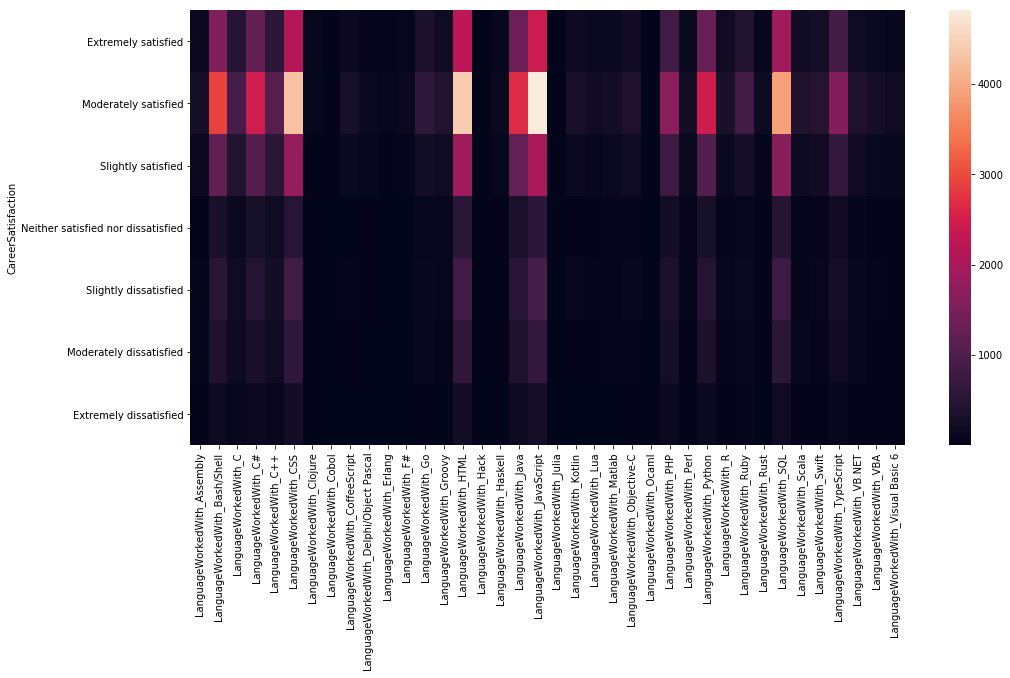

In [72]:
plt.figure(figsize=(16,8))
sns.heatmap(heatmap_input_cs_lww)

# 7. Heatmap shows that developers have higher (moderate) career satisfaction working with CSS, HTML, JavaScript, and SQL.  That is followed by Bash/Shell, C#, Haskell, Python, and other languages.

# Comparison of Career Satisfaction VS Self Taught Types

In [73]:
# Another comparison of Career Satisfaction using Language Worked With
stt_dummies = pd.get_dummies(reduced_df['SelfTaughtTypes'].str.split(';',expand=True).apply(lambda s: s.str.strip()).stack(),prefix='SelfTaughtTypes').sum(level=0)
stt_dummies.head()

,"SelfTaughtTypes_A book or e-book from O’Reilly, Apress, or a similar publisher",SelfTaughtTypes_A college/university computer science or software engineering book,"SelfTaughtTypes_Internal Wikis, chat rooms, or documentation set up by my company for employees","SelfTaughtTypes_Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",SelfTaughtTypes_Pre-scheduled tutoring or mentoring sessions with a friend or colleague,SelfTaughtTypes_Questions & answers on Stack Overflow,"SelfTaughtTypes_Tapping your network of friends, family, and peers versed in the technology",SelfTaughtTypes_The official documentation and/or standards for the technology,SelfTaughtTypes_The technology’s online help system
0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,1,0,1,0
2,1,1,0,1,0,0,1,1,1
3,0,0,0,0,0,1,0,0,0
4,1,0,1,0,1,1,1,1,0


In [74]:
# Using reduced data set from earlier that is just these columns:
# 'Employment,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,SalaryType,ConvertedSalary,EducationTypes,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Gender,SexualOrientation,RaceEthnicity,Age'

df_cs_stt = pd.concat([reduced_df['CareerSatisfaction'],stt_dummies],axis=1) # need to include axis=1 for columns
df_cs_stt.head()

,CareerSatisfaction,"SelfTaughtTypes_A book or e-book from O’Reilly, Apress, or a similar publisher",SelfTaughtTypes_A college/university computer science or software engineering book,"SelfTaughtTypes_Internal Wikis, chat rooms, or documentation set up by my company for employees","SelfTaughtTypes_Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",SelfTaughtTypes_Pre-scheduled tutoring or mentoring sessions with a friend or colleague,SelfTaughtTypes_Questions & answers on Stack Overflow,"SelfTaughtTypes_Tapping your network of friends, family, and peers versed in the technology",SelfTaughtTypes_The official documentation and/or standards for the technology,SelfTaughtTypes_The technology’s online help system
0,Neither satisfied nor dissatisfied,0,0,0,0,0,1,0,1,0
1,Moderately satisfied,0,0,0,1,0,1,0,1,0
2,Moderately satisfied,1,1,0,1,0,0,1,1,1
3,Neither satisfied nor dissatisfied,0,0,0,0,0,1,0,0,0
4,Slightly satisfied,1,0,1,0,1,1,1,1,0


In [75]:
df_cs_stt['CareerSatisfaction'].dtype

dtype('O')

##  Change the Career Satisfaction column to an Ordered Categorical Data Type

In [76]:
df_cs_stt['CareerSatisfaction'] = df_cs_stt['CareerSatisfaction'].astype(cat_dtype) #first step
df_cs_stt.head()

,CareerSatisfaction,"SelfTaughtTypes_A book or e-book from O’Reilly, Apress, or a similar publisher",SelfTaughtTypes_A college/university computer science or software engineering book,"SelfTaughtTypes_Internal Wikis, chat rooms, or documentation set up by my company for employees","SelfTaughtTypes_Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",SelfTaughtTypes_Pre-scheduled tutoring or mentoring sessions with a friend or colleague,SelfTaughtTypes_Questions & answers on Stack Overflow,"SelfTaughtTypes_Tapping your network of friends, family, and peers versed in the technology",SelfTaughtTypes_The official documentation and/or standards for the technology,SelfTaughtTypes_The technology’s online help system
0,Neither satisfied nor dissatisfied,0,0,0,0,0,1,0,1,0
1,Moderately satisfied,0,0,0,1,0,1,0,1,0
2,Moderately satisfied,1,1,0,1,0,0,1,1,1
3,Neither satisfied nor dissatisfied,0,0,0,0,0,1,0,0,0
4,Slightly satisfied,1,0,1,0,1,1,1,1,0


In [77]:
df_cs_stt['CareerSatisfaction'].dtype

CategoricalDtype(categories=['Extremely satisfied', 'Moderately satisfied',
                  'Slightly satisfied', 'Neither satisfied nor dissatisfied',
                  'Slightly dissatisfied', 'Moderately dissatisfied',
                  'Extremely dissatisfied'],
                 ordered=True)

## Group the data and get the counts per language worked with

In [78]:
# Group data in order to get the counts per level of career satisfaction
heatmap_input_cs_stt = df_cs_stt.groupby(['CareerSatisfaction']).sum()   # counts of these languages
heatmap_input_cs_stt.head(7)

,"SelfTaughtTypes_A book or e-book from O’Reilly, Apress, or a similar publisher",SelfTaughtTypes_A college/university computer science or software engineering book,"SelfTaughtTypes_Internal Wikis, chat rooms, or documentation set up by my company for employees","SelfTaughtTypes_Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",SelfTaughtTypes_Pre-scheduled tutoring or mentoring sessions with a friend or colleague,SelfTaughtTypes_Questions & answers on Stack Overflow,"SelfTaughtTypes_Tapping your network of friends, family, and peers versed in the technology",SelfTaughtTypes_The official documentation and/or standards for the technology,SelfTaughtTypes_The technology’s online help system
CareerSatisfaction,,,,,,,,,
Extremely satisfied,1426.0,501.0,479.0,1399.0,96.0,2397.0,686.0,2452.0,1354.0
Moderately satisfied,2886.0,972.0,919.0,2842.0,176.0,4853.0,1135.0,4912.0,2804.0
Slightly satisfied,1255.0,447.0,390.0,1202.0,86.0,2004.0,454.0,2073.0,1189.0
Neither satisfied nor dissatisfied,350.0,144.0,125.0,337.0,28.0,581.0,118.0,604.0,342.0
Slightly dissatisfied,572.0,219.0,180.0,522.0,28.0,903.0,197.0,908.0,536.0
Moderately dissatisfied,448.0,165.0,157.0,427.0,34.0,669.0,141.0,671.0,398.0
Extremely dissatisfied,172.0,49.0,65.0,155.0,12.0,256.0,59.0,263.0,142.0


## Sort the data and then fix the index.

In [79]:
# Sort the values before setting the index
heatmap_input_cs_stt.sort_values(by='CareerSatisfaction', inplace=True)

In [80]:
# Set the index to get this sorted order to the data
heatmap_input_cs_stt.head(7)

,"SelfTaughtTypes_A book or e-book from O’Reilly, Apress, or a similar publisher",SelfTaughtTypes_A college/university computer science or software engineering book,"SelfTaughtTypes_Internal Wikis, chat rooms, or documentation set up by my company for employees","SelfTaughtTypes_Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)",SelfTaughtTypes_Pre-scheduled tutoring or mentoring sessions with a friend or colleague,SelfTaughtTypes_Questions & answers on Stack Overflow,"SelfTaughtTypes_Tapping your network of friends, family, and peers versed in the technology",SelfTaughtTypes_The official documentation and/or standards for the technology,SelfTaughtTypes_The technology’s online help system
CareerSatisfaction,,,,,,,,,
Extremely satisfied,1426.0,501.0,479.0,1399.0,96.0,2397.0,686.0,2452.0,1354.0
Moderately satisfied,2886.0,972.0,919.0,2842.0,176.0,4853.0,1135.0,4912.0,2804.0
Slightly satisfied,1255.0,447.0,390.0,1202.0,86.0,2004.0,454.0,2073.0,1189.0
Neither satisfied nor dissatisfied,350.0,144.0,125.0,337.0,28.0,581.0,118.0,604.0,342.0
Slightly dissatisfied,572.0,219.0,180.0,522.0,28.0,903.0,197.0,908.0,536.0
Moderately dissatisfied,448.0,165.0,157.0,427.0,34.0,669.0,141.0,671.0,398.0
Extremely dissatisfied,172.0,49.0,65.0,155.0,12.0,256.0,59.0,263.0,142.0


# Heatmap of Career Satisfaction VS Self-Taught Type

# 7. Career satisfaction was high among self-taught individuals that used questions & answers on stack overflow; official Documentation and/or standards for the technology; Other propular strategies were A book or e-book from O'Reilly, Apress, or a similar publisher; and online developer communities other than stack overflow (ex. forums, listservs, IRC channels, etc.)

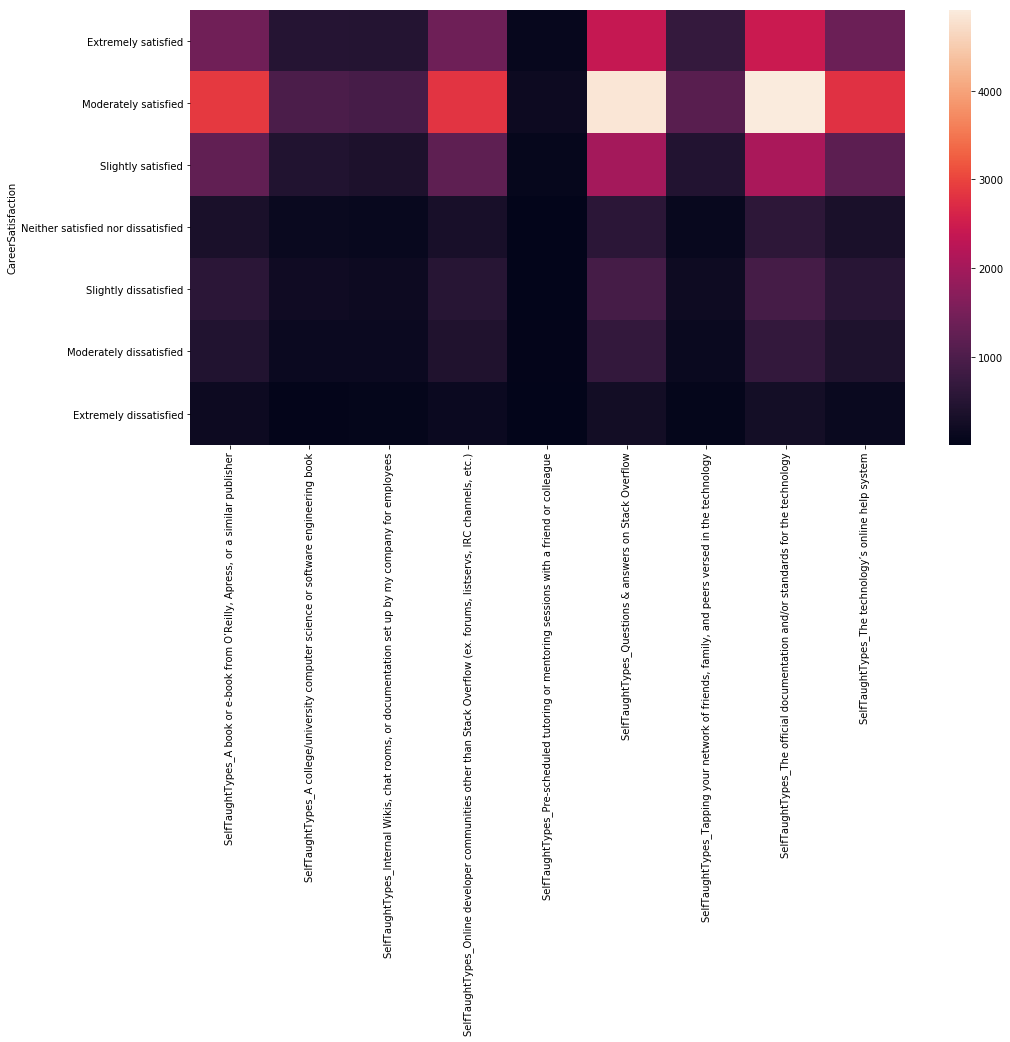

In [81]:
plt.figure(figsize=(16,8))
sns.heatmap(heatmap_input_cs_stt)